In [1]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import random
import os

In [2]:
train_df = pd.read_csv('./dataset/train.csv')
train_series_descriptions_df = pd.read_csv('./dataset/train_series_descriptions.csv')
train_label_coordinates_df = pd.read_csv('./dataset/train_label_coordinates.csv')

# train.csv和train_label_coordinates.csv 合并
df_train_step_1 = pd.merge(left=train_label_coordinates_df, right=train_df, how='left', on='study_id').reset_index(drop=True)
df_train_step_1.head()

# 一共：48692 rows × 8 columns

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild


In [3]:
# df_train_step_1和train_series_descriptions.csv 合并
df_train = pd.merge(left=df_train_step_1, right=train_series_descriptions_df, how='left', on=['study_id', 'series_id']).reset_index(drop=True)
df_train.head()

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR


中国宝宝爱看的Data Analysis - First Step  来源： https://www.kaggle.com/code/liaoguoying/data-analysis-first-step

In [4]:
# # 初始化一个新的列，用于存储series_description
# train_label_coordinates_df['series_description'] = ''

# # 创建一个字典用于查找series_description
# description_dict = {}
# for idx, row in train_series_descriptions_df.iterrows():
#     key = (row['study_id'], row['series_id'])
#     description_dict[key] = row['series_description']
#
# # 遍历train_label_coordinates_df并添加series_description
# for idx, row in train_label_coordinates_df.iterrows():
#     key = (row['study_id'], row['series_id'])
#     if key in description_dict:
#         train_label_coordinates_df.at[idx, 'series_description'] = description_dict[key]

In [5]:
df_train.to_csv('dataset/train_converted.csv', index=False)
df_train.head(100)
# 48692 rows × 8 columns

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8785691,2406919186,12,Left Subarticular Stenosis,L3/L4,205.220339,205.423729,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Axial T2
96,8785691,2406919186,16,Left Subarticular Stenosis,L4/L5,207.254237,202.983051,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Axial T2
97,8785691,2406919186,17,Right Subarticular Stenosis,L4/L5,175.435583,198.360736,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Axial T2
98,8785691,2406919186,20,Left Subarticular Stenosis,L5/S1,209.491525,201.152542,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Axial T2


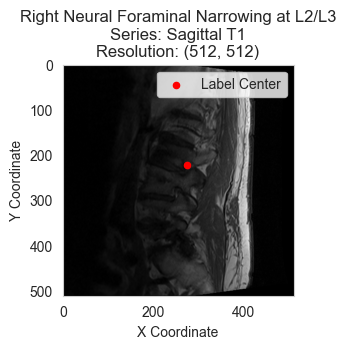

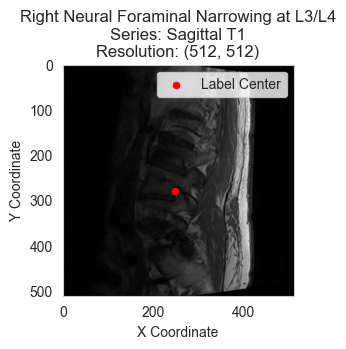

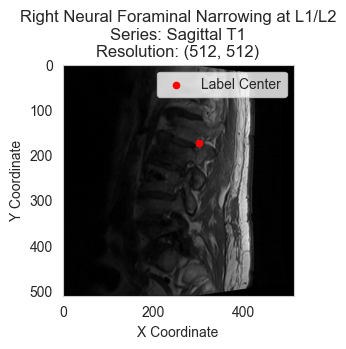

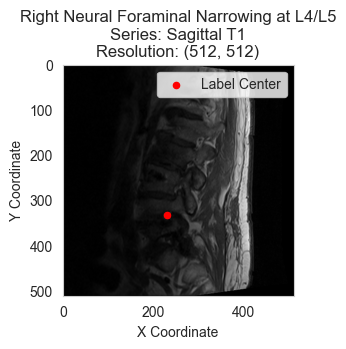

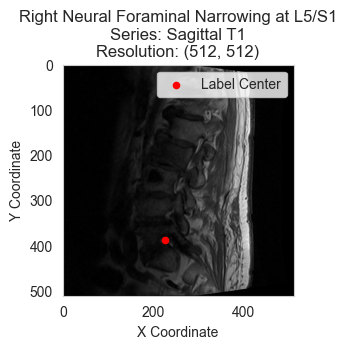

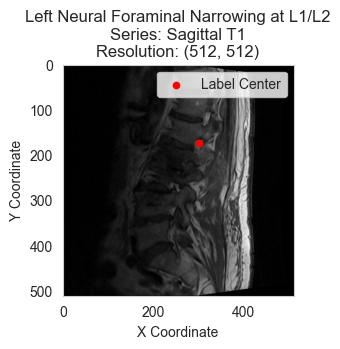

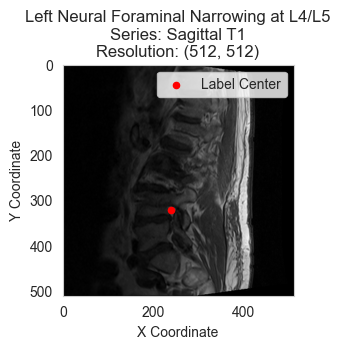

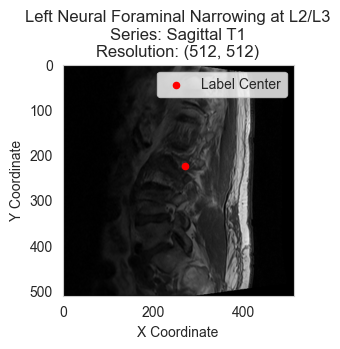

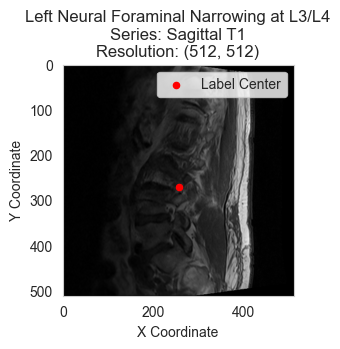

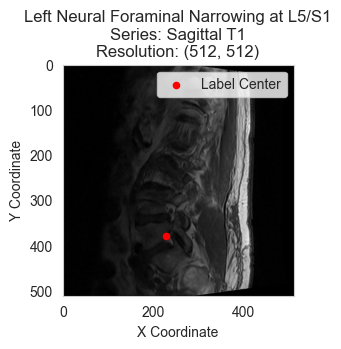

In [14]:
train_converted_df = pd.read_csv('./dataset/train_converted.csv')
# 随机选择series_id，获取所有series_id的行
random_series_id = train_converted_df['series_id'].sample(n=1).iloc[0]
series_df = train_converted_df[train_converted_df['series_id'] == random_series_id]
# 获取study_id,series_description
study_id = series_df['study_id'].iloc[0]
series_description = series_df['series_description'].iloc[0]

for idx, row in series_df.iterrows():
    instance_number = row['instance_number']
    condition = row['condition']
    level = row['level']
    x, y = row['x'], row['y']

    dicom_file_path = f'./dataset/train_images/{study_id}/{random_series_id}/{instance_number}.dcm'

    if os.path.exists(dicom_file_path):
        dicom_image = pydicom.dcmread(dicom_file_path)
        image_data = dicom_image.pixel_array
        resolution = image_data.shape

        plt.figure(figsize=(3, 3))
        plt.imshow(image_data, cmap='gray')
        plt.scatter([x], [y], color='red', s=20, label='Label Center')
        plt.title(f'{condition} at {level}\nSeries: {series_description}\nResolution: {resolution}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(False)
        plt.show()
    else:
        print(f'File not found: {dicom_file_path}')